## [NOTE] We are not continuing further with the previous idea of `Predicting the Laptop Price based on its relevant features`, because of the diversity of the data and issues in scraping the data due the website data & infrastructure. 
### We have changed the idea to :
### - Building a recommendor systems
### - Complete EDA on the dataset and predicting relation between the Book's popularity and colours on the Book cover page

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Amazon_Books_logo.svg/2560px-Amazon_Books_logo.svg.png)

<div class="alert alert-block alert-info" style="background-color:#1F6A68;
                                                 color:white;
                                                 padding : 10px;
                                                 font-size:130%;
                                                 border-width :3px;
                                                 font-family: 'Copperplate';
                                                 border-color:#F3F32F;
                                                 border-radius:25px;
                                                 width:98%;
                                                 margin: 10;
                                                 text-align: left;"><li>In this project, we analysed dataset of bestselling books available on Amazon Website to gain insights into the characteristics and trends of popular books across different genres.
<li>Our goal is to use exploratory data analysis (EDA) to explore relationships and patterns within the data, and to develop a deeper understanding of the book market.</li>

<li>The dataset contains information on following attributes : 
    The columns in the dataset are: 
   <ul> <li> URL  : web address of the book</li>
<li> Title : Title of the book</li>
<li> Price: Price of the book</li>
<li> five_star_rating : Number of five star ratings/100</li>
<li>  four_star_rating : Number of four star ratings/100</li>
<li>  three_star_rating : Number of three star ratings/100</li>
<li>  two_star_rating : Number of two star ratings/100</li>
<li> one_star_rating : Number of one star ratings/100</li>
<li> overall_rating : Overall rating on the book</li>
<li> No_of_ratings : Total number of ratings</li>
<li>  cover_img_url : Url of Image of Book cover</li>
<li> genre : Genre of book </li></ul>
<li>We will use this data to investigate questions such as:
   <ul> <li> What are the most popular genres among readers?</li>
    <li> How do book prices vary across genres?</li>
    <li> Are there any relationships between book ratings and prices?</li>
       <li> what are some common characteristics of top-selling books?</ul></li>

<li>We will be employing a range of visualization and data analysis techniques, including histograms and box plots. Through these methods, we hope to uncover valuable insights into the book market.</li></div>



### We scraped the data for all genres using `requests`, and `scraperapi`. 
The links to all the data and scraping files are given below:
kaggle - scraped notebooks drive link :
https://drive.google.com/drive/folders/1M51XKHavqkOJgwYZntJb9xuZPus8BMwB?usp=sharing

Parsed 54 genres csv files drive link:
https://drive.google.com/drive/folders/1_qJyYY0McUjjKNQspz5_JYlEAnatSqom?usp=sharing

zipped image files drive link :
https://drive.google.com/drive/folders/1a3xUTIWc5cpLn7EYHEzdv20EPnWACaK6?usp=sharing

kaggle notebook to save images into kaggle/working directory link:
https://www.kaggle.com/code/ravindramanne/saving-images-into-directory

## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

from wordcloud import WordCloud
rc = {
    "axes.facecolor": "#F8EAF2",
    "figure.facecolor": "#FFFFEA",
    "axes.edgecolor": "#581845",
    "font.family": "harman",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4}
sns.set(rc=rc)

## Storing the data for visualisation

In [ ]:
#Creating list of csv file names in the directory

directory1 = "/content/drive/MyDrive/Books"
def dataf_creation(directory):
    files = os.listdir(directory)
    csv_files = [f for f in files if f.endswith('.csv')]

    #creating an empty list to store the modified DataFrames

    dfs = []

    #Adding a new column with the name of the file to each dataFrame using the assign() function

    for file in csv_files:
        file_path = os.path.join(directory, file)
        data = pd.read_csv(file_path)
        dfs.append(data)
    
    #Joining all the dataframes
    
    combined_data = pd.concat(dfs, axis=0)

    return combined_data

df_1 = dataf_creation(directory1)


In [ ]:
df_1.info()
df_1 = df_1.sample(frac=1).reset_index(drop= True)
df_1['Genre'] = df_1['Genre'].str.replace("\(1\)", '')
df_1['Genre'] = df_1['Genre'].str.replace('.csv', '')
df_1['URL'] = df_1['URL'].str.replace(' http://api.scraperapi.com?api_key=a174547de4ed80b1a16124d892a86fbd&url=', '')
df_1['Genre'] = df_1['Genre'].str.replace('_', ' ')
df_1.head()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 0 to 97
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              4680 non-null   object 
 1   URL                4680 non-null   object 
 2   Title              4680 non-null   object 
 3   Price              4680 non-null   float64
 4   five_star_rating   4680 non-null   float64
 5   four_star_rating   4680 non-null   float64
 6   three_star_rating  4680 non-null   float64
 7   two_star_rating    4680 non-null   float64
 8   one_star_rating    4680 non-null   float64
 9   overall_rating     4680 non-null   float64
 10  No_of_ratings      4680 non-null   float64
 11  cover_img_url      4680 non-null   object 
dtypes: float64(8), object(4)
memory usage: 475.3+ KB


<ipython-input-336-35a609f1169e>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-336-35a609f1169e>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-336-35a609f1169e>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,Genre,URL,Title,Price,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,overall_rating,No_of_ratings,cover_img_url
0,Creativity,http://api.scraperapi.com?api_key=eeb18bdab309...,Booming Digital Stars: 11 Inspiring Journeys f...,198.80,0.72,0.15,0.06,0.03,0.04,4.5,444.0,https://m.media-amazon.com/images/I/51PtTawThG...
1,Action & Adventure,http://api.scraperapi.com?api_key=c1af2862234c...,Legend of Suheldev: The King Who Saved India,223.30,0.64,0.24,0.08,0.03,0.02,4.4,7403.0,https://m.media-amazon.com/images/I/51ruqvin-c...
2,Religious & Spiritual Fiction,http://api.scraperapi.com?api_key=fdb1dc577e15...,Hiranyakashyap: The Narasimha Trilogy Book 2,140.00,0.62,0.27,0.09,0.01,0.01,4.5,567.0,https://m.media-amazon.com/images/I/51bmlu-5dJ...
3,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,The Bolivian Diary (Penguin Modern Classics),392.96,0.81,0.11,0.07,0.01,0.01,4.7,85.0,https://m.media-amazon.com/images/W/IMAGERENDE...
4,Plays,http://api.scraperapi.com?api_key=fdb1dc577e15...,Mr. Perfect (Malhotras),283.00,0.50,0.28,0.14,0.04,0.03,4.2,288.0,https://m.media-amazon.com/images/I/41T7J1-bXq...


In [ ]:
df_1['URL'][0]

'http://api.scraperapi.com?api_key=eeb18bdab3095d098e6bb5d11029182a&url=https://www.amazon.in/Booming-Digital-Stars-Inspiring-Journeys/dp/9354589480/ref=zg_bs_23033712031_sccl_16/000-0000000-0000000?psc=1'

In [ ]:
books_df = df_1
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              4680 non-null   object 
 1   URL                4680 non-null   object 
 2   Title              4680 non-null   object 
 3   Price              4680 non-null   float64
 4   five_star_rating   4680 non-null   float64
 5   four_star_rating   4680 non-null   float64
 6   three_star_rating  4680 non-null   float64
 7   two_star_rating    4680 non-null   float64
 8   one_star_rating    4680 non-null   float64
 9   overall_rating     4680 non-null   float64
 10  No_of_ratings      4680 non-null   float64
 11  cover_img_url      4680 non-null   object 
dtypes: float64(8), object(4)
memory usage: 438.9+ KB


In [ ]:
books_df.columns

Index(['Genre', 'URL', 'Title', 'Price', 'five_star_rating',
       'four_star_rating', 'three_star_rating', 'two_star_rating',
       'one_star_rating', 'overall_rating', 'No_of_ratings', 'cover_img_url'],
      dtype='object')

In [ ]:
books_df['Genre'].nunique()

54

In [ ]:
books_df.head()

,Genre,URL,Title,Price,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,overall_rating,No_of_ratings,cover_img_url
0,Creativity,http://api.scraperapi.com?api_key=eeb18bdab309...,Booming Digital Stars: 11 Inspiring Journeys f...,198.80,0.72,0.15,0.06,0.03,0.04,4.5,444.0,https://m.media-amazon.com/images/I/51PtTawThG...
1,Action & Adventure,http://api.scraperapi.com?api_key=c1af2862234c...,Legend of Suheldev: The King Who Saved India,223.30,0.64,0.24,0.08,0.03,0.02,4.4,7403.0,https://m.media-amazon.com/images/I/51ruqvin-c...
2,Religious & Spiritual Fiction,http://api.scraperapi.com?api_key=fdb1dc577e15...,Hiranyakashyap: The Narasimha Trilogy Book 2,140.00,0.62,0.27,0.09,0.01,0.01,4.5,567.0,https://m.media-amazon.com/images/I/51bmlu-5dJ...
3,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,The Bolivian Diary (Penguin Modern Classics),392.96,0.81,0.11,0.07,0.01,0.01,4.7,85.0,https://m.media-amazon.com/images/W/IMAGERENDE...
4,Plays,http://api.scraperapi.com?api_key=fdb1dc577e15...,Mr. Perfect (Malhotras),283.00,0.50,0.28,0.14,0.04,0.03,4.2,288.0,https://m.media-amazon.com/images/I/41T7J1-bXq...


In [ ]:
train_to_scale = books_df[['Price', 'five_star_rating', 'four_star_rating',
       'three_star_rating', 'two_star_rating', 'one_star_rating',
       'overall_rating', 'No_of_ratings']]

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68 ;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-width :5px;
                                                 border-radius:15px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;">How does the Distribution in the numerical columns looks like ? </div>

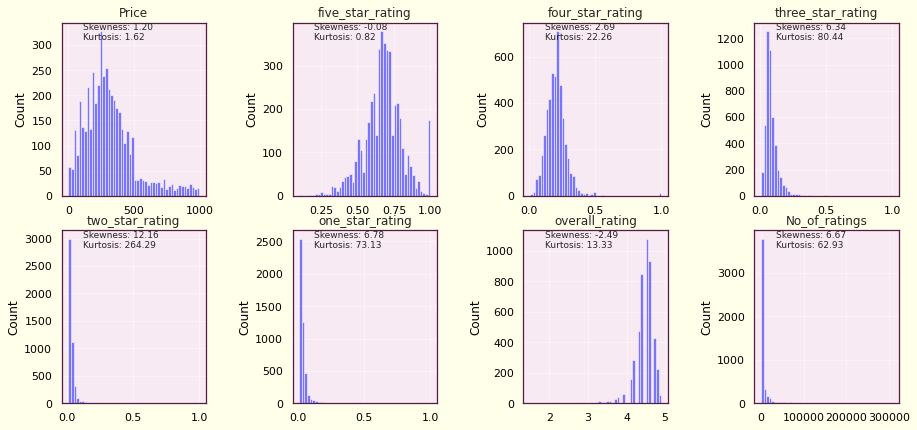

In [ ]:
def generate_plot(train_to_scale) : 

    fig, axs = plt.subplots(2,4, figsize=(15, 7))
    fig.subplots_adjust(wspace=0.6)
    axs = axs.ravel()
    cmap = sns.color_palette("RdBu", as_cmap=True)
    skewness = train_to_scale.skew()
    kurtosis = train_to_scale.kurtosis()
    for i, column in enumerate(train_to_scale.columns):
        axs[i].set_title(column)
        axs[i].hist(train_to_scale[column], bins=50, alpha=0.5,color  ='blue')
        axs[i].set_ylabel('Count')
        axs[i].annotate(text='Skewness: {:.2f}\nKurtosis: {:.2f}'.format(skewness[column], kurtosis[column]), xy=(0.15, 0.9), xycoords='axes fraction', fontsize=9)
    plt.show()
generate_plot(train_to_scale)

## We can deduce that : 
### 1. One_star_rating is highly right-skewed
#### -> This can be because of the reason that not many books were highly negatively rated
### 2. No_of_ratings is higly right-skewed 
#### -> Many of the books are not rated by the buyers
  
  
  

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68 ;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;">Are the columns correlated ? </div>

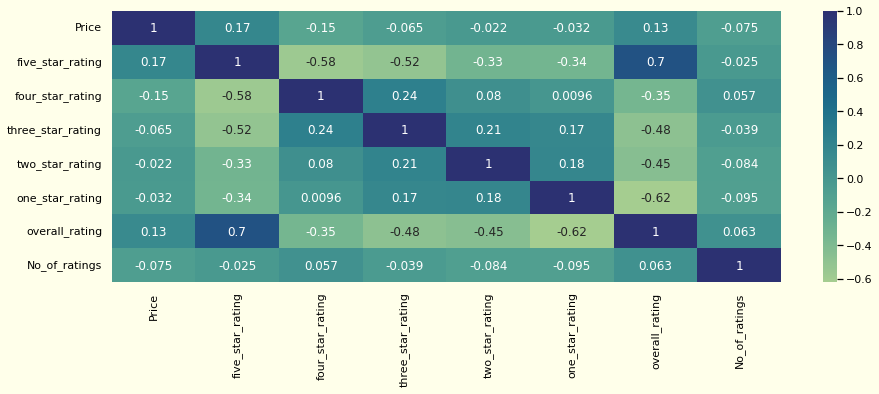

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(train_to_scale.corr(),annot=True,cmap = "crest")
plt.show()

## We can deduce that :
### 1. Overall rating is
#### -> Highly positively correlated with five_star_rating : Number of five star rating is high implies overall rating is high
#### -> Highly negatively correlated with one_star_rating :  Number of one star rating is high implies overall rating is low
   

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68 ;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;"> In what range most of the books are priced ? </div>

In [ ]:
fig = px.box(books_df['Price'])
fig.update_layout(
    title="Prices of different books",
    paper_bgcolor='#FFFFEA',
    xaxis_title="Price",
    boxmode="group",
    boxgap=0.2,
    boxgroupgap=0.1
)
fig.show()


## We can conclude that : 
#### 1. Most of the books are priced in the range Rs. 140 - Rs. 324
#### 2. Many of the books have Price = Rs. 0 : This is because they are the Kindle version of the book. Many of them are offered for free
#### 3. Median Price of the books = Rs. 217

### Targeting the Indian market, most of the Bestselling books are in the affordable range for targeting a large chunk of population


<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68 ;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;">Rating Distribution for each Genre</div>

In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go
import pandas as pd

df_long = pd.melt(books_df, id_vars=['Genre'], value_vars=['five_star_rating', 'four_star_rating',
        'three_star_rating', 'two_star_rating', 'one_star_rating'])

# get the unique values of 'genre'
unique_genres = df_long['Genre'].unique()
# create a subplot grid with three rows and nine columns
fig = sp.make_subplots(rows=6, cols=9, shared_yaxes=True)

# iterate through each unique value of 'genre'
for i, genre_val in enumerate(unique_genres):

    # filtering the long-format DataFrame for the current 'genre' value
    filtered_df = df_long[df_long['Genre'] == genre_val]
    
    # creating a bar plot trace for each variable
    for var in filtered_df['Genre'].unique():
        var_df = pd.DataFrame(books_df[books_df['Genre']== var][['five_star_rating', 'four_star_rating',
        'three_star_rating', 'two_star_rating', 'one_star_rating']].sum()*100).transpose()
        trace = go.Bar(x=var_df.columns, y=var_df.iloc[0], name=var)
        # get the subplot row and column for the current 'genre' value
        row = i // 9 + 1
        col = i % 9 + 1
        
        fig.add_trace(trace, row=row, col=col)

    # setting the subplot title for the current 'genre'
    fig.update_xaxes(title_text=genre_val, row=row, col=col)
    fig.update_yaxes(title_text='count', row=1, col=1)


# Setting the height and width 
fig.update_layout(paper_bgcolor='#FFFFEA',height=1000, width=2500
                 )
fig.update_layout(title='Counts of five_star_rating,  four_star_rating, three_star_rating,  two_star_rating and one_star_rating  by Genre',font=dict(size=10))
# show the plot
fig.show()




### We can deduce that :
#### Most of the genres have similar rating distribution
#### Some of the genres like : 
#### 1. Maps & Atlases
#### 2. Biographies, Diaries and True Accounts
#### 3. Society and Social Sciences
#### 4. Reference
#### 5. Science and Mathematics
#### 6. Religion
#### 7. Politics
#### 8. Business Economics
#### They are highly 5-star rated (positively rated) . It means thatt after-purchase feedback is very good for books in this genres, i.e.
#### most of the people buying them are liking it .

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;"> Which words appear in most of the Books' Title? : WORD CLOUD</div>

## It shows the most common occuring words. Larger the word, higher is occurence

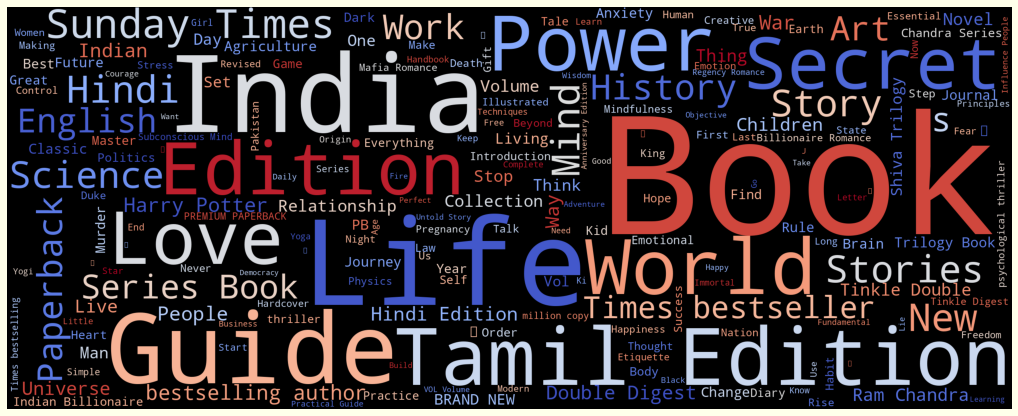

In [ ]:
# Creating a string of all the book titles
titles_string = ' '.join(list(books_df['Title']))

# Creating a word cloud object
wordcloud = WordCloud(width=2500, height=1000, background_color='black', colormap='coolwarm', min_font_size=10)

# Generating the word cloud
wordcloud.generate(titles_string)

plt.figure(figsize=(18,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## We can deduce that the words like :`Book`, `Life` , `India` ,`English`, `Paperback` , etc are most occuring words in the Title of all the books across all genres

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;">Price distribution for each genre</div>

## We have created a Box Plot showing the price distribution for each genre

In [ ]:
# Creating a box plot of the Price column for each genre
fig = px.box(books_df, x='Genre', y='Price', color='Genre')

fig.update_layout(title='Box plot of book prices by genre',paper_bgcolor='#FFFFEA')

fig.show()


## We can deduce that:
####  1. Books in the genres like : `Maps and Atlases`, `Exam Preparation`, `Business Economics`, `Crime Thriller and Mystery` , `Society and Social Sciences`, `Textbooks and Study Guides` , `Reference` and `Romance` are having median < Rs. 200. 
#### It means that many of the bestsellers are in this genres are highly affordable
#### 2. There is no fixed range for the pricing of the books in the genres `Children and Young Adult`.
#### 3. Genres like`Sports` and `Science Technology and Medicine` have various outliers

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;"> Can we deduce which genre is most popular on Amazon?</div>

### The hypotheis is : More number of Purchases -> More number of Ratings -> More popular

In [ ]:
import plotly.graph_objs as go

# Creating a groupby object on genre and get the sum of No_of_ratings
genre_ratings = books_df.groupby('Genre')['No_of_ratings'].sum()

fig = go.Figure(go.Bar(x=genre_ratings.index, y=genre_ratings, marker_color='green'))
fig.update_layout(title='Number of Ratings by Genre', xaxis_title='Genre', yaxis_title='Number of Ratings',paper_bgcolor='#FFFFEA')

fig.show()


### Firstly, we need to check whether data is balanced or not, across all genres.

<div style = 'border: 3px solid #D9C10B;'>

<a id="1"></a><div class="alert alert-block alert-info" style="background-color:#1F6A68;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;"> Number of Books per genre </div>

In [ ]:
genre_counts =  pd.DataFrame(books_df.groupby('Genre')['Title'].count())
genre_counts.columns = ['Number of Books']
genre_counts = genre_counts.sort_values('Number of Books', ascending=False)
table_trace = go.Table(
    header=dict(values=['Genre', 'Number of Books']),
    cells=dict(values=[genre_counts.index, genre_counts['Number of Books']]))
fig = go.Figure(data=[table_trace])
fig.update_layout(paper_bgcolor='#FFFFEA')
fig.show()


### We can deduce that :
#### Since the number of books per genre is not same, It means number of ratings per book will obviously not be the same
#### Therefore, with the current dataset we cannot confidently say that a particular genre is more popular or not

<div style = 'border: 3px solid #D9C10B;'>

<div class="alert alert-block alert-info" style="background-color:#1F6A68;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:250%;
                                                 font-family: 'sans';
                                                 border-color:#F3F32F;
                                                 border-radius:15px;
                                                 border-width :5px;
                                                 width:95%;
                                                 margin: 40;
                                                 text-align: center;"> Rating v/s Price </div>

In [ ]:
fig = px.scatter(books_df, x='overall_rating', y='Price', color='Genre', hover_data=['Title'])
fig.update_layout(title='Ratings v/s Price',paper_bgcolor='#FFFFEA')
fig.show()

## We can deduce that :
### There is no any relation between the Overall rating and the Price of the books
### Most of the books which are rated in the range 4-4.5 have the Price in range Rs. 0 - Rs. 500

<div style = 'border: 3px solid #D9C10B;'>

JPEG
(377, 499)
Red ratio: 204.90038963869384
Green ratio: 160.92668626377423
Blue ratio: 164.55882055888966
Red ratio: 138.60699365702172
Orange ratio: 0.0
Yellow ratio: 23.352079947759407
Green ratio: 38.33328305175797
Blue ratio: 13.20560478358215
Indigo ratio: 0.0
Violet ratio: 0.0


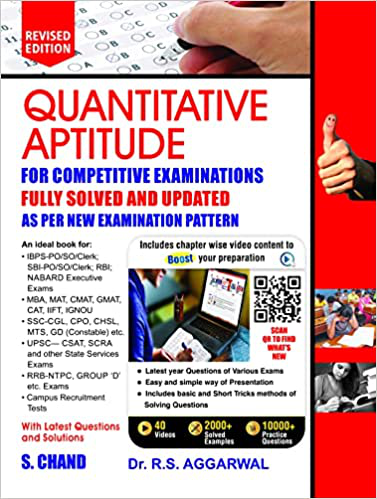

In [ ]:
import urllib.request

url_1 = "https://m.media-amazon.com/images/I/51ye03CBd8L._SX375_BO1,204,203,200_.jpg"
filename = "my_image.jpeg"

urllib.request.urlretrieve(url_1, filename)


from PIL import Image

image = Image.open("my_image.jpeg")
print(image.format)  # "JPEG"
print(image.size)    # (416, 416)


image

from PIL import Image

# Loading the image
image = image

# Converting the image to RGB format
image = image.convert('RGB')

# Getting the total number of pixels in the image
total_pixels = image.width * image.height

# Initializing variables to store the sum of each color channel
red_sum = 0
green_sum = 0
blue_sum = 0

# Looping through each pixel in the image
for x in range(image.width):
    for y in range(image.height):
        # Getting the RGB values of the pixel
        r, g, b = image.getpixel((x, y))
        
        # Adding the color channel values to the corresponding sum
        red_sum += r
        green_sum += g
        blue_sum += b

# Calculating the ratio of each color channel
red_ratio = red_sum / total_pixels
green_ratio = green_sum / total_pixels
blue_ratio = blue_sum / total_pixels

# Printing the RGB ratios
print(f"Red ratio: {red_ratio}")
print(f"Green ratio: {green_ratio}")
print(f"Blue ratio: {blue_ratio}")


from PIL import Image

# Load the image
image = image

# Convert the image to RGB format
image = image.convert('RGB')

# Get the total number of pixels in the image
total_pixels = image.width * image.height

# Initialize variables to store the sum of each color channel
red_sum = 0
orange_sum = 0
yellow_sum = 0
green_sum = 0
blue_sum = 0
indigo_sum = 0
violet_sum = 0

# Loop through each pixel in the image
for x in range(image.width):
    for y in range(image.height):
        # Get the RGB values of the pixel
        r, g, b = image.getpixel((x, y))
        
        # Calculate the maximum and minimum color values
        max_value = max(r, g, b)
        min_value = min(r, g, b)
        delta = max_value - min_value
        
        # Calculate the hue of the pixel (in degrees)
        hue = 0
        if delta != 0:
            if max_value == r:
                hue = ((g - b) / delta) % 6
            elif max_value == g:
                hue = ((b - r) / delta) + 2
            else:
                hue = ((r - g) / delta) + 4
        hue *= 60
        
        # Add the color channel values to the corresponding sum
        if hue < 30 or hue >= 330:
            red_sum += max_value
        elif hue < 60:
            red_sum += (60 - hue) / 30 * max_value
            yellow_sum += (hue - 30) / 30 * max_value
        elif hue < 120:
            yellow_sum += max_value
        elif hue < 180:
            yellow_sum += (180 - hue) / 60 * max_value
            green_sum += (hue - 120) / 60 * max_value
        elif hue < 240:
            green_sum += max_value
        elif hue < 300:
            green_sum += (300 - hue) / 60 * max_value
            blue_sum += (hue - 240) / 60 * max_value
        else:
            blue_sum += max_value
            
# Calculate the ratio of each color channel
red_ratio = red_sum / total_pixels
orange_ratio = orange_sum / total_pixels
yellow_ratio = yellow_sum / total_pixels
green_ratio = green_sum / total_pixels
blue_ratio = blue_sum / total_pixels
indigo_ratio = indigo_sum / total_pixels
violet_ratio = violet_sum / total_pixels

# Print the ratios
print(f"Red ratio: {red_ratio}")
print(f"Orange ratio: {orange_ratio}")
print(f"Yellow ratio: {yellow_ratio}")
print(f"Green ratio: {green_ratio}")
print(f"Blue ratio: {blue_ratio}")
print(f"Indigo ratio: {indigo_ratio}")
print(f"Violet ratio: {violet_ratio}")
image

## We can conclude that :
### It is evident that red has more span in the image, therefore the red ratio is high
### The colors of the book cover may/may not be relate : we will be working on it 
### We will also be working on extracting Secondary colors as well

<div style = 'border: 3px solid #D9C10B;'>

# Conclusion:

### 1. There are some correlated columns like `overall_ratings` and `five_star_ratings`
### 2. Most of the bestselling books in some genres are in the range Rs. 150 - Rs. 400
### 3. There is no significant relation between the books are rated high and their price
### 4. `Book` is the highest occuring word across all Book titles

<div style = 'border: 3px solid #D9C10B;'>

##Image Feature extraction

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import pandas as pd
import seaborn as sns
import os
import plotly.express as px

from wordcloud import WordCloud
rc = {
    "axes.facecolor": "#F8EAF2",
    "figure.facecolor": "#FFFFEA",
    "axes.edgecolor": "#581845",
    "font.family": "harman",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4}
sns.set(rc=rc)

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creating list of csv file names in the directory

directory1 = "/content/drive/MyDrive/Books"
def dataf_creation(directory):
    files = os.listdir(directory)
    csv_files = [f for f in files if f.endswith('.csv')]

    #creating an empty list to store the modified DataFrames

    dfs = []

    #Adding a new column with the name of the file to each dataFrame using the assign() function
    for file in csv_files:
        file_path = os.path.join(directory, file)
        data = pd.read_csv(file_path)
        dfs.append(data)
    
    #Joining all the dataframes
    
    combined_data = pd.concat(dfs, axis=0)

    return combined_data

df_1 = dataf_creation(directory1)
    

In [ ]:
#Viewing the combined dataframe
df_1.head()

,Genre,URL,Title,Price,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,overall_rating,No_of_ratings,cover_img_url
0,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Autobiography of a Yogi,30.45,0.75,0.17,0.05,0.01,0.02,4.6,9599.0,https://m.media-amazon.com/images/W/IMAGERENDE...
1,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Raat Pashmine Ki (Hindi),235.00,0.63,0.24,0.09,0.01,0.03,4.4,825.0,https://m.media-amazon.com/images/I/4144lVJjr2...
2,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Why I am an Atheist and Other Works,29.00,0.73,0.18,0.06,0.01,0.02,4.6,6001.0,https://m.media-amazon.com/images/I/41KjA2iNXv...
3,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Ambedkar's India,29.00,0.72,0.19,0.05,0.01,0.02,4.6,2323.0,https://m.media-amazon.com/images/I/512hMmtr1H...
4,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,The Diary of a Young Girl,78.40,0.71,0.19,0.06,0.02,0.03,4.5,253.0,https://m.media-amazon.com/images/I/41OV7z5oLT...


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 0 to 97
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              4680 non-null   object 
 1   URL                4680 non-null   object 
 2   Title              4680 non-null   object 
 3   Price              4680 non-null   float64
 4   five_star_rating   4680 non-null   float64
 5   four_star_rating   4680 non-null   float64
 6   three_star_rating  4680 non-null   float64
 7   two_star_rating    4680 non-null   float64
 8   one_star_rating    4680 non-null   float64
 9   overall_rating     4680 non-null   float64
 10  No_of_ratings      4680 non-null   float64
 11  cover_img_url      4680 non-null   object 
dtypes: float64(8), object(4)
memory usage: 475.3+ KB


In [ ]:
#Creating a rank column
df_1['rank'] = df_1.groupby('Genre').cumcount() + 1
df_1.head()

,Genre,URL,Title,Price,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,overall_rating,No_of_ratings,cover_img_url,rank
0,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Autobiography of a Yogi,30.45,0.75,0.17,0.05,0.01,0.02,4.6,9599.0,https://m.media-amazon.com/images/W/IMAGERENDE...,1
1,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Raat Pashmine Ki (Hindi),235.00,0.63,0.24,0.09,0.01,0.03,4.4,825.0,https://m.media-amazon.com/images/I/4144lVJjr2...,2
2,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Why I am an Atheist and Other Works,29.00,0.73,0.18,0.06,0.01,0.02,4.6,6001.0,https://m.media-amazon.com/images/I/41KjA2iNXv...,3
3,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Ambedkar's India,29.00,0.72,0.19,0.05,0.01,0.02,4.6,2323.0,https://m.media-amazon.com/images/I/512hMmtr1H...,4
4,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,The Diary of a Young Girl,78.40,0.71,0.19,0.06,0.02,0.03,4.5,253.0,https://m.media-amazon.com/images/I/41OV7z5oLT...,5


## Getting cover images from the url and viewing them

In [ ]:
#retreiving one of the images from its URL
import urllib.request

url_1 = 'https://m.media-amazon.com/images/I/51KaDVFb0qL._SY264_BO1,204,203,200_QL40_ML2_.jpg'
filename = "my_image.jpeg"

urllib.request.urlretrieve(url_1, filename)

('my_image.jpeg', <http.client.HTTPMessage at 0x7fa2a18cc040>)

Shape: (266, 173, 3)


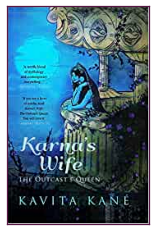

In [ ]:
image = cv2.imread('my_image.jpeg')
print("Shape: {}".format(image.shape))
plt.imshow(image)
plt.xticks(())
plt.yticks(())
plt.show()

We can see that the image has different colors as compared to the original image. This is because OpenCV reads the images in the color order `BLUE GREEN RED` i.e. `BGR`. Thus, we need to convert it into `REG GREEN BLUE` i.e. `RGB`.

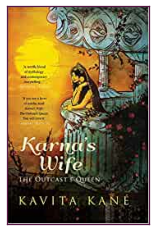

In [ ]:
#converting the image colors
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.xticks(())
plt.yticks(())
plt.show()

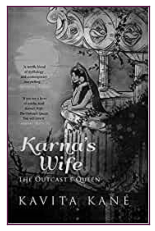

In [ ]:
#viewing the grayscale version of the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

### Edge detection and extraction

In [ ]:
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v, sobel

# prewitt kernel
pre_hor = prewitt_h(gray_image)
pre_ver = prewitt_v(gray_image)

# Sobel Kernel
ed_sobel = sobel(gray_image)

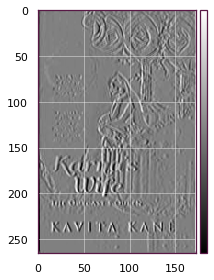

In [ ]:
imshow(pre_ver, cmap='gray');
plt.xticks(())
plt.yticks(())
plt.show()

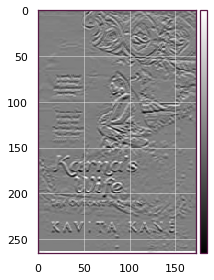

In [ ]:
imshow(pre_hor, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

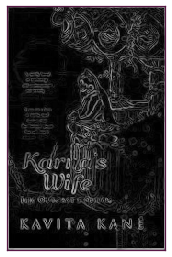

In [ ]:
imshow(ed_sobel, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

# **Colour identification using K-means clustering**

Reference source: https://github.com/kb22/Color-Identification-using-Machine-Learning/blob/master/.ipynb_checkpoints/Color%20Identification%20using%20Machine%20Learning-checkpoint.ipynb

In the above github repository, `KMeans` was used to extract colors from a give image and presented in the form of a pie chart. We have used this to create our code for obtaining the top 10 colors of an image.

Further, we used the second part of the code given in the article as an inspiration to create custom color bins.

In [ ]:
#Defining a function to give hex values of colors that are identified
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
#Defining a function to get the image and convert it to RGB scale
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
#Defining a function that reshapes the images and performs K-means clustering to obtain the top 'n' colours in the image
#This function also shows the colors using a pie chart
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (64,64), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors,n_init=10)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([ 92.329718  , 100.06290672,  86.92407809]),
 array([129.81707317,  80.65853659,  42.95934959]),
 array([189.02816901, 125.51830986,  47.07042254]),
 array([129.79459459, 136.77837838, 120.71891892]),
 array([241.27464789, 206.88732394,  18.13380282]),
 array([40.89583333, 35.08541667, 25.76458333]),
 array([222.20035778, 159.12880143,  45.13595707]),
 array([16.89728097, 13.65407855,  9.68126888]),
 array([182.18390805, 182.75862069, 162.4137931 ]),
 array([64.76237624, 62.77623762, 49.92871287])]

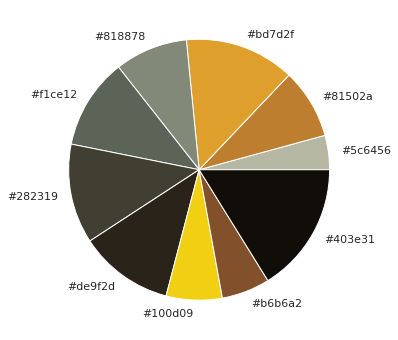

In [ ]:
#Viewing the results of K-means clustering for the above taken image
get_colors(get_image('my_image.jpeg'), 10, True)

## Creating custom bins for organizing 'similar' color shades

Source: https://stackoverflow.com/questions/44428315/similar-color-detection-in-python

Here, we have used the above-mentioned source as our reference to make custom bins. The similarilty between the colors is measured using Euclidean distance. We make use of `deltaE_cie76` to measure this after converting the rgb colors to lab space. 

We have converted the color space because computing distances for RGB or HEX values directly requires a lot of computation power for large number of images. LAB space, being colr uniform and device independent, allows us to check for similarity in a much faster and easier way. 

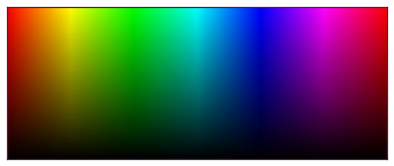

In [ ]:
#Viewing the RGB color scale
from skimage import io
from skimage.color import rgb2lab, deltaE_cie76

rgb = io.imread('https://i.stack.imgur.com/npnrv.png')
lab = rgb2lab(rgb)

io.imshow(rgb)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#Creating a custom color map using a few colors and seeting thresholds around them
color_map = {
    'Red': {'rgb code': [255, 0, 0], 'threshold': 35 },
    'Yellow': {'rgb code': [255, 255, 0], 'threshold': 25 },
    'Blue': {'rgb code': [0, 0, 205], 'threshold': 25 },
    'Orange': {'rgb code': [255, 165, 0], 'threshold': 25 },
    'Green': {'rgb code': [0, 100, 0], 'threshold': 35 },
    'Violet': {'rgb code': [128, 0, 128], 'threshold': 20 },
    'Black': {'rgb code': [0, 0, 0], 'threshold': 20 },
    'White': {'rgb code': [255, 255, 255], 'threshold': 15 },
    'Indigo': {'rgb code': [0, 0, 128], 'threshold': 15 },
    'Light blue': {'rgb code': [0, 191, 255], 'threshold': 60 },
    'Pink': {'rgb code': [218, 29, 129], 'threshold': 20 },
    'Magenta': {'rgb code': [255, 0, 255], 'threshold': 30 },
    'Light green': {'rgb code': [0, 255, 0], 'threshold': 35 },
    'Brown': {'rgb code': [128, 70, 27], 'threshold': 25 },
    'Maroon': {'rgb code': [127, 23, 52], 'threshold': 20 }
}

In [ ]:
#Converting the above created dictionary into a dataframe
colors_df = pd.DataFrame(color_map).T
colors_df.head()

,rgb code,threshold
Red,"[255, 0, 0]",35
Yellow,"[255, 255, 0]",25
Blue,"[0, 0, 205]",25
Orange,"[255, 165, 0]",25
Green,"[0, 100, 0]",35


In [ ]:
#Creating custom bins using the above dictionary
for i in range(len(colors_df)):
    label = colors_df.index[i]
    threshold = colors_df.at[label,'threshold']
    col_3d = np.uint8(np.asarray([[colors_df.at[label,'rgb code']]]))
    dE_col = deltaE_cie76(rgb2lab(col_3d), lab)
    rgb[dE_col < threshold]= col_3d

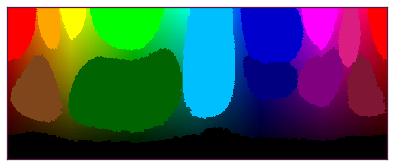

In [ ]:
#Visualizing these custom bins
io.imshow(rgb)
plt.xticks(())
plt.yticks(())
plt.show()

The thresholds defined above act as the distances upto which the difference between the chosen color and the colors defined in the dictionary are considered to be similar.

Using these, we create functions to do this matching and classifying into bins for all the images.

In [ ]:
#Helper function to get the custom bins dataframe
def get_colors_df():
    color_map = {
        'Red': {'rgb code': [255, 0, 0], 'threshold': 35 },
        'Yellow': {'rgb code': [255, 255, 0], 'threshold': 25 },
        'Blue': {'rgb code': [0, 0, 205], 'threshold': 25 },
        'Orange': {'rgb code': [255, 165, 0], 'threshold': 25 },
        'Green': {'rgb code': [0, 100, 0], 'threshold': 35 },
        'Violet': {'rgb code': [128, 0, 128], 'threshold': 20 },
        'Black': {'rgb code': [0, 0, 0], 'threshold': 20 },
        'White': {'rgb code': [255, 255, 255], 'threshold': 15 },
        'Indigo': {'rgb code': [0, 0, 128], 'threshold': 15 },
        'Light blue': {'rgb code': [0, 191, 255], 'threshold': 60 },
        'Pink': {'rgb code': [218, 29, 129], 'threshold': 20 },
        'Magenta': {'rgb code': [255, 0, 255], 'threshold': 30 },
        'Light green': {'rgb code': [0, 255, 0], 'threshold': 35 },
        'Brown': {'rgb code': [128, 70, 27], 'threshold': 25 },
        'Maroon': {'rgb code': [127, 23, 52], 'threshold': 20 }
    }
    colors_df = pd.DataFrame(color_map).T
    
    return colors_df

In [ ]:
#get_colors_df().head()

In [ ]:
#Helper function to sort a given color into the closest bin, based on its LAB distance
def get_closest_color(image, color):
    
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    df = get_colors_df()
    
    for i in range(len(df)):
        label = df.index[i]
        thresh = df.at[label,'threshold']
        curr_color = rgb2lab(np.uint8(np.asarray([[df.at[label,'rgb code']]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < thresh):
            col = df.at[label,'rgb code']
            label = label
            return col, label
        else:
            col = 0
            label = 0
    
    return col, label

In [ ]:
#This helper function takes in an image and gives the colors after classifying them into the closest color bins
def get_selected_colors(image,number_of_colors):
    image_colors = get_colors(image, number_of_colors, False)
    
    selected_colors = []
    for i in range(len(image_colors)):
        col, label = get_closest_color(image, image_colors[i])
        selected_colors.append(label)

    return selected_colors

In [ ]:
#Verifying if the above functions work as expected on the selected image
top_colors = np.asarray(get_selected_colors(get_image('my_image.jpeg'),10))

In [ ]:
top_colors

array(['Light blue', 'Light blue', 'Black', 'Light blue', 'Black',
       'Yellow', '0', 'Orange', 'Brown', '0'], dtype='<U21')

## Obtaining the information for all the images

The below written code is the code used for extracting the data, but it was run on another system and the results have been presented in the next section.

In [ ]:
#Importing the images from the zip file
import zipfile
with zipfile.ZipFile(r"/content/drive/MyDrive/Books - DS1 Project (1)/imgs_cover.zip", 'r') as zip_ref:
    zip_ref.extractall('images_cover')
with zipfile.ZipFile(r"/content/drive/MyDrive/Books - DS1 Project (1)/imgs_cover.zip", 'r') as zip_ref:
    zip_ref.extractall('images_cover')    

In [ ]:
#Creating a directory for the images
import os

IMAGE_DIRECTORY = r"/content/images_cover"
images = []
filenames = []

for file in sorted(os.listdir(IMAGE_DIRECTORY)):
    if file.endswith('.jpg'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
        filenames.append(file)

In [ ]:
#Creating a dataframe to store the recognized colors
%%time
color_idx = ['image', 'color 1','color 2', 'color 3', 'color 4', 'color 5', 'color 6', 'color 7', 'color 8', 'color 9', 'color 10']
img_df = pd.DataFrame(columns = color_idx)
colors_list = []
index = 0 
for img in range(img_df.shape[0]):
    top_cols = np.asarray(get_selected_colors(images[img],10))
    
    img_df.at[index,'image'] = filenames[img]
    for col in range(1,len(top_cols)):
        img_df.at[index, color_idx[col]] = top_cols[col]
        colors_list.append(top_cols[col])
    
    index = index + 1

In [ ]:
#Creating a dataframe to get all the recognized colors and their bins
df = pd.DataFrame(colors_list,columns=['color'])
df.head()

In [ ]:
#Creating a dataframe to see the percentage of various color bins in each image
%%time
df_2 = img_df.drop('image',axis=1)
#Creating column index for dataframe
cols = np.asarray(get_colors_df().index)
col_names = np.append(['image'],cols)
#Creating a dataframe that stores the proportion of each bin in a given image
prop_df = pd.DataFrame(columns=col_names)
#Populating the dataframe
for i in range(df_2.shape[0]):
  count = df_2.loc[i].value_counts().values
  sum = df_2.loc[i].value_counts().sum()
  count_idx = df_2.loc[i].value_counts().index

  prop_df.at[i,'image'] = img_df.at[i,'image']
  for j in range(len(count)):
    label = count_idx[j] 
    if (count_idx[j] !='0'):
      prop_df.at[i,label] = float(np.round(count[j] / sum,2))

prop_df = prop_df.replace(np.NaN,float(0.0))

## Drawing Conclusions based on the data obtained from the previous section

In [ ]:
directory2 = "/content/drive/MyDrive/Colors of each book"
cols_book = dataf_creation(directory2)
cols_book.drop("Unnamed: 0",axis=1,inplace=True)
cols_book.drop("0",axis=1,inplace=True)

In [ ]:
directory3 = "/content/drive/MyDrive/Top colors"
top_cols = dataf_creation(directory3)
top_cols.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
top_cols.head()

,color
0,0
1,0
2,0
3,Brown
4,Light blue


In [ ]:
top_cols['color'].value_counts()

Light blue     6280
0              6189
White          1621
Black          1426
Brown          1245
Green           292
Red             287
Orange          268
Maroon          170
Yellow          132
Pink             49
Violet           17
Light green       9
Blue              9
Indigo            5
Magenta           1
Name: color, dtype: int64

In [ ]:
cols_book.head()

,image,Red,Yellow,Blue,Orange,Green,Violet,Black,White,Indigo,Light blue,Pink,Magenta,Light green,Brown,Maroon
0,Action & Adventure_001.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.44,0.0,0.0,0.0,0.11,0.0
1,Action & Adventure_002.jpg,0.11,0.0,0.0,0.00,0.0,0.0,0.11,0.11,0.0,0.33,0.0,0.0,0.0,0.11,0.0
2,Action & Adventure_003.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.22,0.0,0.44,0.0,0.0,0.0,0.00,0.0
3,Action & Adventure_004.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.11,0.00,0.0,0.00,0.0,0.0,0.0,0.56,0.0
4,Action & Adventure_005.jpg,0.00,0.0,0.0,0.11,0.0,0.0,0.11,0.11,0.0,0.22,0.0,0.0,0.0,0.11,0.0


In [ ]:
cols_book.shape

(2000, 16)

In [ ]:
for i in cols_book.index:
  ch = str(cols_book.at[i,'image']).split('_')[1]
  cols_book .at[i,'rank'] = int(ch.split('.')[0])

In [ ]:
cols_book.head()

,image,Red,Yellow,Blue,Orange,Green,Violet,Black,White,Indigo,Light blue,Pink,Magenta,Light green,Brown,Maroon,rank
0,Action & Adventure_001.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.44,0.0,0.0,0.0,0.11,0.0,1.0
1,Action & Adventure_002.jpg,0.11,0.0,0.0,0.00,0.0,0.0,0.11,0.11,0.0,0.33,0.0,0.0,0.0,0.11,0.0,2.0
2,Action & Adventure_003.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.22,0.0,0.44,0.0,0.0,0.0,0.00,0.0,3.0
3,Action & Adventure_004.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.11,0.00,0.0,0.00,0.0,0.0,0.0,0.56,0.0,4.0
4,Action & Adventure_005.jpg,0.00,0.0,0.0,0.11,0.0,0.0,0.11,0.11,0.0,0.22,0.0,0.0,0.0,0.11,0.0,5.0


In [ ]:
cols_book['rank'] = cols_book['rank'].astype(int)
cols_book.head()

,image,Red,Yellow,Blue,Orange,Green,Violet,Black,White,Indigo,Light blue,Pink,Magenta,Light green,Brown,Maroon,rank
0,Action & Adventure_001.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.44,0.0,0.0,0.0,0.11,0.0,1
1,Action & Adventure_002.jpg,0.11,0.0,0.0,0.00,0.0,0.0,0.11,0.11,0.0,0.33,0.0,0.0,0.0,0.11,0.0,2
2,Action & Adventure_003.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.22,0.0,0.44,0.0,0.0,0.0,0.00,0.0,3
3,Action & Adventure_004.jpg,0.00,0.0,0.0,0.00,0.0,0.0,0.11,0.00,0.0,0.00,0.0,0.0,0.0,0.56,0.0,4
4,Action & Adventure_005.jpg,0.00,0.0,0.0,0.11,0.0,0.0,0.11,0.11,0.0,0.22,0.0,0.0,0.0,0.11,0.0,5


In [ ]:
fin_df = pd.merge(df_1,cols_book, on='rank',how='inner')
fin_df.drop_duplicates(subset='Title',inplace=True)
fin_df.head()

,Genre,URL,Title,Price,five_star_rating,four_star_rating,three_star_rating,two_star_rating,one_star_rating,overall_rating,...,Violet,Black,White,Indigo,Light blue,Pink,Magenta,Light green,Brown,Maroon
0,Diaries & Journals,http://api.scraperapi.com?api_key=c1af2862234c...,Autobiography of a Yogi,30.45,0.75,0.17,0.05,0.01,0.02,4.6,...,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.0,0.11,0.0
24,Crime Fiction,http://api.scraperapi.com?api_key=c1af2862234c...,தழல் பட்சியவள் பைரவி (Tamil Edition),150.00,1.00,0.23,0.06,0.01,0.01,4.5,...,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.0,0.11,0.0
48,Antiques & Collectables,http://api.scraperapi.com?api_key=c1af2862234c...,Sultan : A Memoir,251.55,0.62,0.23,0.11,0.03,0.01,4.4,...,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.0,0.11,0.0
72,Mangas,http://api.scraperapi.com?api_key=c1af2862234c...,Tinkle Double Digest No 155,150.00,0.72,0.14,0.05,0.04,0.04,4.5,...,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.0,0.11,0.0
96,True Accounts,http://api.scraperapi.com?api_key=c1af2862234c...,Wise and Otherwise: A salute to Life [Paperbac...,119.70,0.73,0.20,0.04,0.01,0.01,4.6,...,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.0,0.11,0.0


In [ ]:
fin_df.shape

(3681, 29)

In [ ]:
colors_list = top_cols['color'].value_counts().index.drop('0')
colors_list

Index(['Light blue', 'White', 'Black', 'Brown', 'Green', 'Red', 'Orange',
       'Maroon', 'Yellow', 'Pink', 'Violet', 'Light green', 'Blue', 'Indigo',
       'Magenta'],
      dtype='object')

In [ ]:
import plotly.express as px

plot_df = cols_book.drop(['image','rank'],axis=1)
plot_df = plot_df[cols_book['rank']==1] 
cols = ['Light blue', 'White', 'Black', 'Brown', 'Green', 'Red']
fig = px.bar(plot_df, x=plot_df.index, y=cols, barmode='stack',
             color_discrete_sequence=['blue', 'white','black','brown','green','red'], labels={'x': 'Genre',
                                                                 'y': 'Ratio of each color bin'},
             title='Bar plot of proportion of color bins in books of rank 1')

fig.update_layout(font={'size': 12})

fig.show()

## **Conclusions**



1. From the stacked plots above, we can observe that light blue color is present in the greatest amount for the bestsellers.
2. This information is insufficient to draw conclusions if the cover pages really affect the popularity of a book.


## Future scope

1. We hypothesize that the cover images do not really affect the popularity of a given book. To prove our claim, we need to further devise CNNs on the collected data.
2. We can also use NLP to analyze the sentiments of customers and see which factors really do affect the popularity of a book.

# **Text detection and extraction**

We tried to extract the text from the images, but it did not work well. This was because the OCR tool could not recognize the different fonts.

In [ ]:
#pip install pytesseract

In [ ]:
#import pytesseract
# Mention the installed location of Tesseract-OCR in your system
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

In [ ]:
#text = pytesseract.image_to_string(gray_image)
#print(text)